# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

### Question 1

#### Read the dataset

In [8]:
import pandas as pd

# File path
file_path = "01-01-2021.csv"  # Update this with the correct path

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows
df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.93911,67.709953,52513,2201,41727,8585,Afghanistan,134.896578,4.191343
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.15330,20.168300,58316,1181,33634,23501,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.03390,1.659600,99897,2762,67395,29740,Algeria,227.809861,2.764848
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.50630,1.521800,8117,84,7463,570,Andorra,10505.403482,1.034865
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.20270,17.873900,17568,405,11146,6017,Angola,53.452981,2.305328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4006,NaN,NaN,Unknown,Ukraine,2021-01-02 05:22:33,NaN,NaN,0,0,0,0,"Unknown, Ukraine",0.000000,0.000000
4007,NaN,NaN,NaN,Nauru,2021-01-02 05:22:33,-0.52280,166.931500,0,0,0,0,Nauru,0.000000,0.000000
4008,NaN,NaN,Niue,New Zealand,2021-01-02 05:22:33,-19.05440,-169.867200,0,0,0,0,"Niue, New Zealand",0.000000,0.000000
4009,NaN,NaN,NaN,Tuvalu,2021-01-02 05:22:33,-7.10950,177.649300,0,0,0,0,Tuvalu,0.000000,0.000000


#### Display the top 5 rows in the data

In [9]:
df.head(5)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.93911,67.709953,52513,2201,41727,8585,Afghanistan,134.896578,4.191343
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.15330,20.168300,58316,1181,33634,23501,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.03390,1.659600,99897,2762,67395,29740,Algeria,227.809861,2.764848
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.50630,1.521800,8117,84,7463,570,Andorra,10505.403482,1.034865
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.20270,17.873900,17568,405,11146,6017,Angola,53.452981,2.305328


#### Show the information of the dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4011 entries, 0 to 4010
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3265 non-null   float64
 1   Admin2               3270 non-null   object 
 2   Province_State       3833 non-null   object 
 3   Country_Region       4011 non-null   object 
 4   Last_Update          4011 non-null   object 
 5   Lat                  3922 non-null   float64
 6   Long_                3922 non-null   float64
 7   Confirmed            4011 non-null   int64  
 8   Deaths               4011 non-null   int64  
 9   Recovered            4011 non-null   int64  
 10  Active               4011 non-null   int64  
 11  Combined_Key         4011 non-null   object 
 12  Incident_Rate        3922 non-null   float64
 13  Case_Fatality_Ratio  3963 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 438.8+ KB


#### Show the sum of missing values of features in the dataset

In [11]:
missing_value = df.isnull().sum()
missing_value

FIPS                   746
Admin2                 741
Province_State         178
Country_Region           0
Last_Update              0
Lat                     89
Long_                   89
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
Combined_Key             0
Incident_Rate           89
Case_Fatality_Ratio     48
dtype: int64

### Question 2

#### Show the number of Confirmed cases by Country

In [12]:
confirmed_cases_country = df.groupby('Country_Region')['Confirmed'].sum().reset_index()
confirmed_cases_country

,Country_Region,Confirmed
0,Afghanistan,52513
1,Albania,58316
2,Algeria,99897
3,Andorra,8117
4,Angola,17568
...,...,...
195,West Bank and Gaza,139223
196,Winter Olympics 2022,0
197,Yemen,2101
198,Zambia,20997


#### Show the number of Deaths by Country

In [13]:
death_per_country = df.groupby('Country_Region')['Deaths'].sum().reset_index()
death_per_country

,Country_Region,Deaths
0,Afghanistan,2201
1,Albania,1181
2,Algeria,2762
3,Andorra,84
4,Angola,405
...,...,...
195,West Bank and Gaza,1418
196,Winter Olympics 2022,0
197,Yemen,610
198,Zambia,390


#### Show the number of Recovered cases by Country

In [14]:
recovered_per_country = df.groupby('Country_Region')['Recovered'].sum().reset_index()
recovered_per_country

,Country_Region,Recovered
0,Afghanistan,41727
1,Albania,33634
2,Algeria,67395
3,Andorra,7463
4,Angola,11146
...,...,...
195,West Bank and Gaza,118926
196,Winter Olympics 2022,0
197,Yemen,1396
198,Zambia,18773


#### Show the number of Active Cases by Country

In [15]:
active_cases_per_country = df.groupby('Country_Region')['Active'].sum().reset_index()
active_cases_per_country

,Country_Region,Active
0,Afghanistan,8585
1,Albania,23501
2,Algeria,29740
3,Andorra,570
4,Angola,6017
...,...,...
195,West Bank and Gaza,18879
196,Winter Olympics 2022,0
197,Yemen,95
198,Zambia,1834


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [17]:

latest_covid_data = df.groupby("Country_Region")[["Confirmed", "Deaths", "Recovered", "Active"]].sum().reset_index()
latest_covid_data

,Country_Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,52513,2201,41727,8585
1,Albania,58316,1181,33634,23501
2,Algeria,99897,2762,67395,29740
3,Andorra,8117,84,7463,570
4,Angola,17568,405,11146,6017
...,...,...,...,...,...
195,West Bank and Gaza,139223,1418,118926,18879
196,Winter Olympics 2022,0,0,0,0
197,Yemen,2101,610,1396,95
198,Zambia,20997,390,18773,1834


### Question 3

### Show the countries with no recovered cases

In [20]:
latest_data = df.groupby("Country_Region")[["Recovered"]].sum().reset_index()

# Filter countries where Recovered cases are 0
no_recovered = latest_data[latest_data["Recovered"] == 0][["Country_Region", "Recovered"]]

no_recovered

,Country_Region,Recovered
5,Antarctica,0
17,Belgium,0
92,Kiribati,0
93,"Korea, North",0
125,Nauru,0
136,Palau,0
156,Serbia,0
169,Summer Olympics 2020,0
171,Sweden,0
180,Tonga,0


#### Show the countries with no confirmed cases

In [21]:
latest_data = df.groupby("Country_Region")[["Confirmed"]].sum().reset_index()

no_confirmed = latest_data[latest_data["Confirmed"] == 0][["Country_Region", "Confirmed"]]
no_confirmed

,Country_Region,Confirmed
5,Antarctica,0
92,Kiribati,0
93,"Korea, North",0
125,Nauru,0
136,Palau,0
169,Summer Olympics 2020,0
180,Tonga,0
184,Tuvalu,0
196,Winter Olympics 2022,0


#### Show the countries with no deaths

In [22]:
# Group by Country_Region and sum up the Deaths cases
latest_data = df.groupby("Country_Region")[["Deaths"]].sum().reset_index()

# Filter countries where Deaths cases are 0
no_deaths = latest_data[latest_data["Deaths"] == 0][["Country_Region", "Deaths"]]

no_deaths

,Country_Region,Deaths
5,Antarctica,0
20,Bhutan,0
31,Cambodia,0
51,Dominica,0
70,Grenada,0
76,Holy See,0
92,Kiribati,0
93,"Korea, North",0
98,Laos,0
114,Marshall Islands,0


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Country_Region,Confirmed,Deaths,Recovered
30,Cambodia,391,0,374
50,Dominica,106,0,98
75,Holy See,27,0,15
95,Laos,41,0,40
111,Marshall Islands,4,0,4
143,Saint Kitts and Nevis,34,0,31
145,Saint Vincent and the Grenadines,249,0,100
146,Samoa,2,0,2
157,Solomon Islands,17,0,10
172,Timor-Leste,49,0,41


### Question 4

#### Show the Top 10 countries with Confirmed cases

In [23]:
# Group by Country_Region and sum up the Confirmed cases
latest_data = df.groupby("Country_Region")[["Confirmed"]].sum().reset_index()

# Sort by Confirmed cases in descending order and select the top 10
top_10_confirmed = latest_data.sort_values(by="Confirmed", ascending=False).head(10)

# Display the result
top_10_confirmed

,Country_Region,Confirmed
185,US,20397401
80,India,10305788
24,Brazil,7703971
146,Russia,3153960
63,France,2697014
189,United Kingdom,2549671
183,Turkey,2220855
86,Italy,2129376
166,Spain,1928265
67,Germany,1721839


#### Show the Top 10 Countries with Active cases

In [24]:
# Group by Country_Region and sum up the cases
latest_data = df.groupby("Country_Region")[["Confirmed", "Deaths", "Recovered", "Active"]].sum().reset_index()

# Sort by Active cases in descending order and select the top 10
top_10_active = latest_data.sort_values(by="Active", ascending=False).head(10)

# Display the result
top_10_active

,Country_Region,Confirmed,Deaths,Recovered,Active
185,US,20397401,352844,0,19978335
189,United Kingdom,2549671,95917,5682,2469774
63,France,2697014,64891,200822,2431301
166,Spain,1928265,50837,150376,1727052
117,Mexico,1437185,126507,1083768,1310678
140,Peru,1015137,93231,951318,921906
127,Netherlands,816616,11624,9651,795341
24,Brazil,7703971,195541,6855372,649795
17,Belgium,648289,19581,0,637588
86,Italy,2129376,74621,1479988,574767


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [25]:
import matplotlib.pyplot as plt

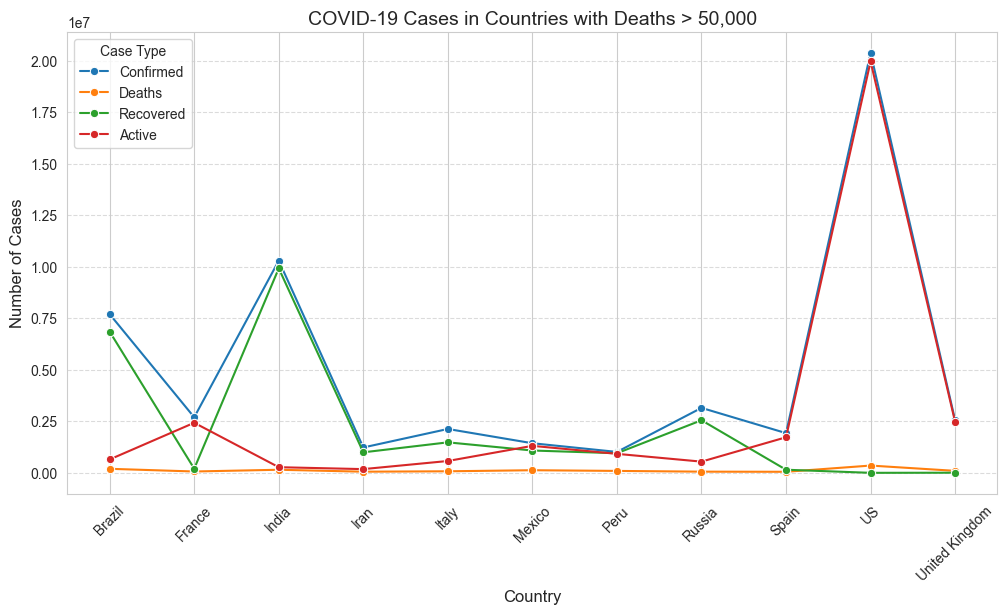

In [27]:
import seaborn as sns
# Group by Country_Region and sum up the cases
latest_data = df.groupby("Country_Region")[["Confirmed", "Deaths", "Recovered", "Active"]].sum().reset_index()

# Filter countries where total deaths exceed 50,000
high_death_countries = latest_data[latest_data["Deaths"] > 50000]

# Set plot style
sns.set_style("whitegrid")

# Plot line graph with markers
plt.figure(figsize=(12, 6))
for column in ["Confirmed", "Deaths", "Recovered", "Active"]:
    sns.lineplot(x=high_death_countries["Country_Region"], y=high_death_countries[column], marker="o", label=column)

# Customize plot
plt.title("COVID-19 Cases in Countries with Deaths > 50,000", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Case Type")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Question 6

### Plot Province/State wise Deaths in USA

In [28]:
import plotly.express as px

In [29]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [30]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

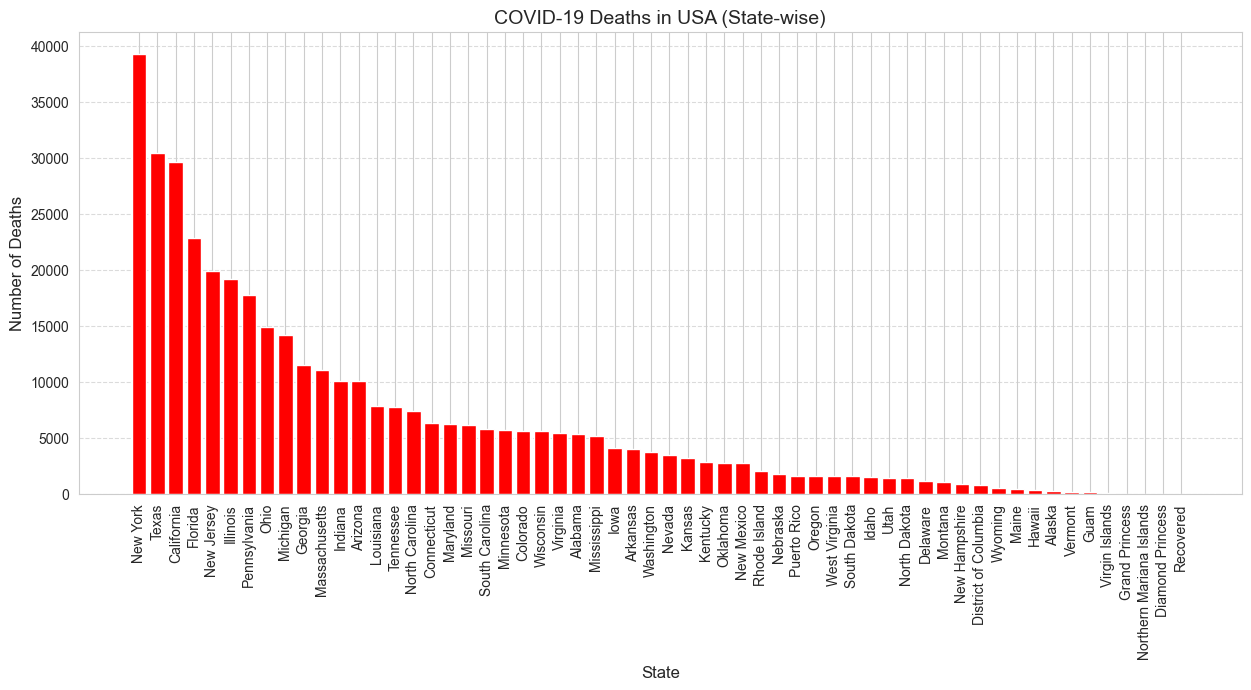

In [32]:
# Filter for USA data
usa_data = covid_data[covid_data["Country_Region"] == "US"]

# Group by Province_State and sum deaths
statewise_deaths = usa_data.groupby("Province_State")["Deaths"].sum().reset_index()

# Sort by deaths in descending order
statewise_deaths = statewise_deaths.sort_values(by="Deaths", ascending=False)

# Plot bar graph
plt.figure(figsize=(15, 6))
plt.bar(statewise_deaths["Province_State"], statewise_deaths["Deaths"], color="red")

# Customize plot
plt.title("COVID-19 Deaths in USA (State-wise)", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of Deaths", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


### Question 7

### Plot Province/State Wise Active Cases in USA

/var/folders/hv/3mfynt4129z_2z_6ry6fx1dh0000gn/T/ipykernel_40211/2217398891.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Province_State', y='Active', data=df_usa_grouped, palette='viridis')


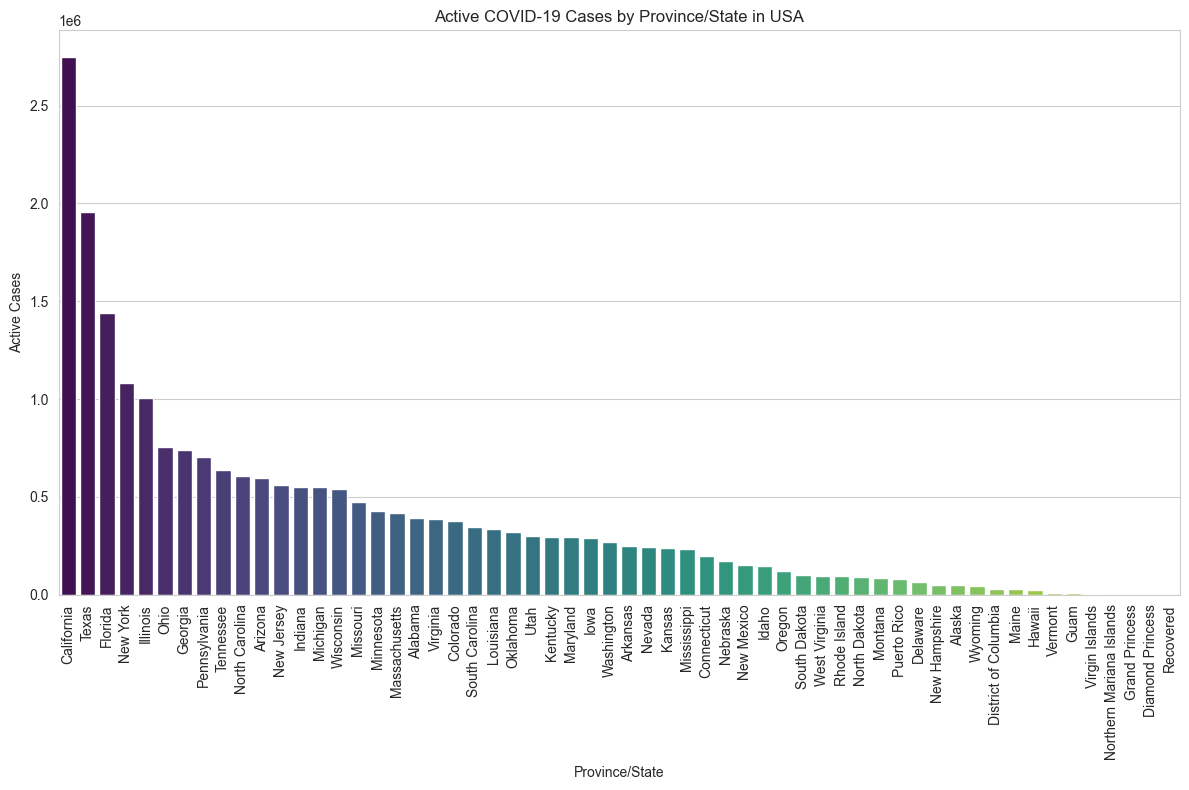

In [40]:
# Filter data for the USA
df_usa = covid_data[covid_data['Country_Region'] == 'US'].copy()  # Use .copy() to avoid the warning

# Calculate active cases
df_usa.loc[:, 'Active'] = df_usa['Confirmed'] - df_usa['Deaths'] - df_usa['Recovered']

# Group by Province_State and sum the active cases
df_usa_grouped = df_usa.groupby('Province_State')['Active'].sum().reset_index()

# Sort by active cases
df_usa_grouped = df_usa_grouped.sort_values(by='Active', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Province_State', y='Active', data=df_usa_grouped, palette='viridis')
plt.xlabel('Province/State')
plt.ylabel('Active Cases')
plt.title('Active COVID-19 Cases by Province/State in USA')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Question 8

### Plot Province/State Wise Confirmed cases in USA

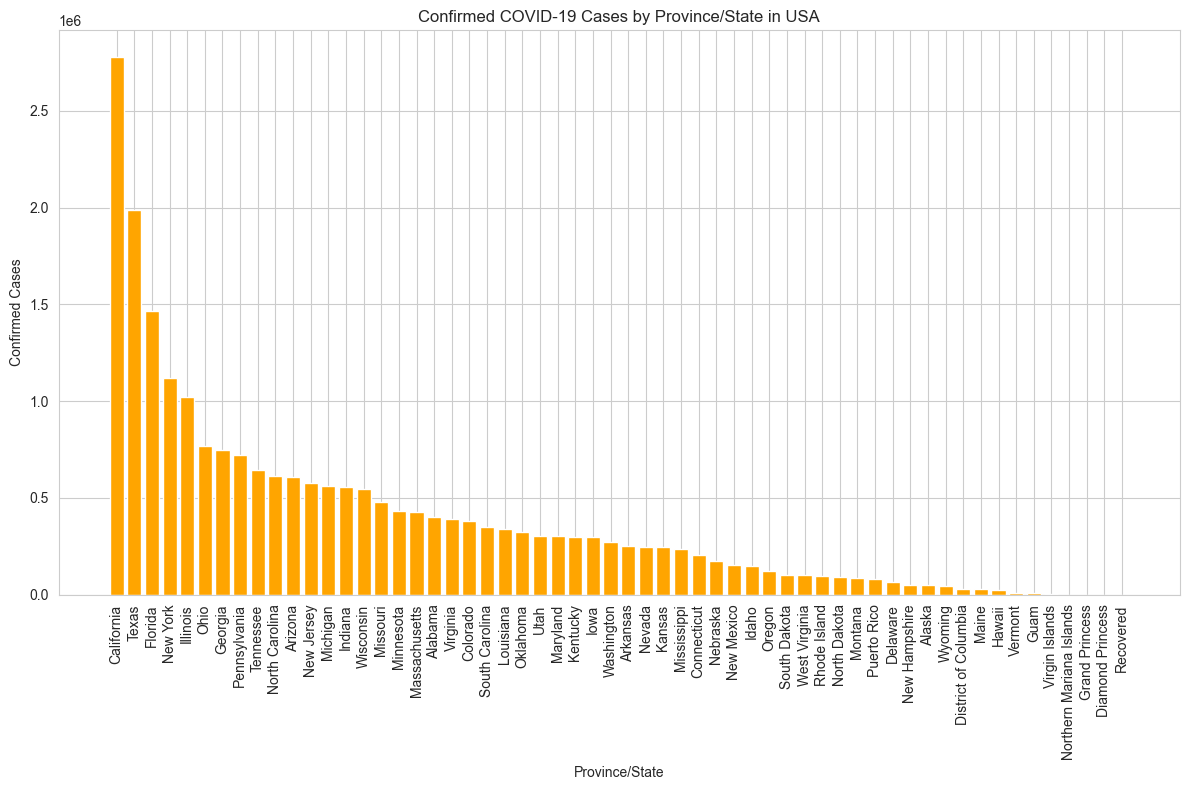

In [41]:
# Group by Province_State and sum the confirmed cases
df_usa_grouped = df_usa.groupby('Province_State')['Confirmed'].sum().reset_index()

# Sort by confirmed cases
df_usa_grouped = df_usa_grouped.sort_values(by='Confirmed', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(df_usa_grouped['Province_State'], df_usa_grouped['Confirmed'], color='orange')
plt.xlabel('Province/State')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed COVID-19 Cases by Province/State in USA')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Question 9

### Plot Worldwide Confirmed Cases over time

In [44]:
import plotly.express as px
import plotly.io as pio

In [58]:
# Melt the dataset to convert it into a long format
df_state = df_usa.groupby('Province_State')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

df_melted =  df_state.melt(id_vars='Province_State', value_vars=['Confirmed', 'Deaths', 'Recovered', 'Active'], var_name='Category', value_name='Count')

# Group by Date and sum the confirmed cases worldwide
df_worldwide = px.bar(
    df_melted,
    x='Province_State',
    y='Count',
    color='Category',
    title='Province/State-wise Cases in the USA',
    labels={'Province_State': 'State', 'Count': 'Number of Cases', 'Category': 'Case Type'},
    barmode='group'
)

# Customize the plot
df_worldwide.update_layout(
    xaxis_title='Province/State',
    yaxis_title='Number of Cases',
    xaxis_tickangle=45,
    legend_title='Case Type',
    title_x=0.5
)


# Show the plot
df_worldwide.show()
